In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
movies = pd.read_csv("D:/movie_metadata.csv")

In [4]:
pd.set_option('display.max_columns', 28)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movies.shape

(5043, 28)

In [6]:
df = movies.drop_duplicates(keep='first',inplace=False) 
# df2=df.loc[df.movie_title.duplicated(keep='first')]

In [7]:
df2=df.loc[df.movie_title.duplicated(keep=False) & df.title_year.duplicated(keep=False)]

In [8]:
# df3=df2.loc[:, ['num_voted_users']]
# df3.loc[df3.num_voted_users.duplicated(keep=False)]


In [9]:
df.shape

(4998, 28)

In [10]:
df.movie_title.nunique()

4917

In [11]:
df3=df2.drop_duplicates(subset='movie_title',keep="first",inplace=False)

In [12]:
df2.movie_title.nunique()

78

In [13]:
df4=df.drop_duplicates(subset='movie_title',keep="first",inplace=False)

In [14]:
movies=df4

In [15]:
movies.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [16]:
movies.isnull().mean().multiply(other=100)

color                         0.386414
director_name                 2.074436
num_critic_for_reviews        0.996543
duration                      0.305064
director_facebook_likes       2.074436
actor_3_facebook_likes        0.467765
actor_2_name                  0.264389
actor_1_facebook_likes        0.142363
gross                        17.551352
genres                        0.000000
actor_1_name                  0.142363
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.467765
facenumber_in_poster          0.264389
plot_keywords                 3.091316
movie_imdb_link               0.000000
num_user_for_reviews          0.427090
language                      0.244051
country                       0.101688
content_rating                6.101281
budget                        9.843400
title_year                    2.155786
actor_2_facebook_likes        0.264389
imdb_score               

In [17]:
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(output_file="movies_preprocessing2.html")

In [18]:
mean_gross = movies['gross'].mean()

movies['gross'].fillna(value=mean_gross, inplace=True)

In [19]:
movies['gross'].isnull().any()

False

In [20]:
mean_budget = movies['budget'].mean()
movies['budget'].fillna(value=mean_budget, inplace=True)

In [21]:
movies['budget'].isnull().any()

False

In [22]:
movies.dropna(subset=['color','director_name','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','plot_keywords','num_user_for_reviews','language','country','content_rating','title_year','actor_2_facebook_likes'], inplace=True)

In [23]:
movies.isnull().any()

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [24]:
mean_aspect_ratio = movies['aspect_ratio'].mean()
movies['aspect_ratio'].fillna(value=mean_aspect_ratio, inplace=True)



In [25]:
movies.shape

(4441, 28)

In [26]:
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(output_file="movies_postprocessing.html")

In [27]:
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [28]:
movies.set_index('movie_title', inplace=True)

In [29]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78000,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35000,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35000,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35000,164000
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35000,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Primer,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85000,19000
Cavite,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.10413,74
El Mariachi,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37000,0


In [30]:
movies.director_name.value_counts()

Steven Spielberg              26
Woody Allen                   22
Martin Scorsese               20
Clint Eastwood                20
Ridley Scott                  16
                              ..
Agnieszka Wojtowicz-Vosloo     1
Deb Hagan                      1
RZA                            1
Hoyt Yeatman                   1
Michael Hoffman Jr.            1
Name: director_name, Length: 2100, dtype: int64

In [31]:
gross_directors = movies.groupby('director_name').agg({'gross': 'mean'})
top_10_gross_directors = gross_directors.sort_values('gross', ascending=False)[:10]
top_10_gross_directors

,gross
director_name,
Lee Unkrich,4.149845e+08
Chris Buck,4.007366e+08
Joss Whedon,3.692024e+08
Tim Miller,3.630243e+08
George Lucas,3.482837e+08
Kyle Balda,3.360296e+08
Colin Trevorrow,3.280925e+08
Yarrow Cheney,3.235055e+08
Pete Docter,3.131138e+08


In [32]:
movies['gross']=movies['gross'].multiply(other=0.000001)

In [33]:
movies


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78000,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35000,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35000,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.130642,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35000,164000
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35000,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Primer,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,72639,368,Casey Gooden,0.0,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85000,19000
Cavite,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,0.070071,Thriller,Ian Gamazon,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.10413,74
El Mariachi,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37000,0


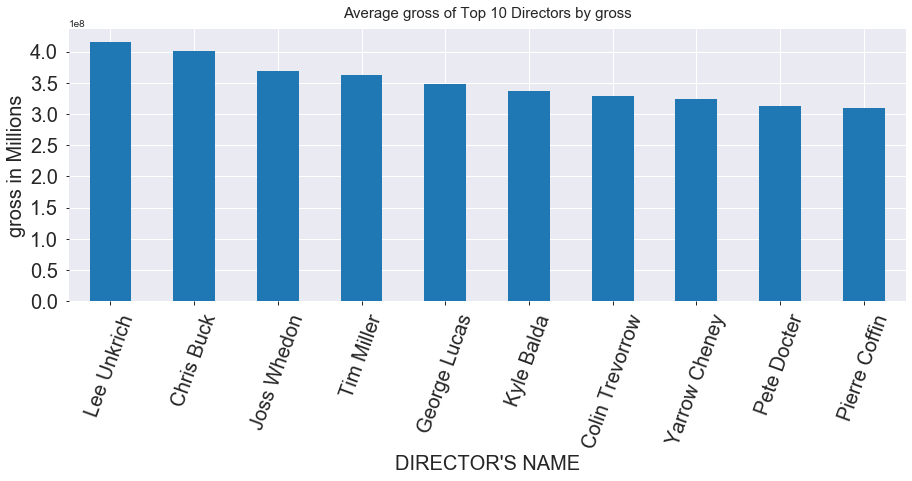

In [34]:
ax = top_10_gross_directors['gross'].plot.bar(fontsize=20 ,figsize=(15,5));
ax.set_ylabel('gross in Millions',fontsize=20)
ax.set_xlabel("DIRECTOR'S NAME",fontsize=20)
ax.set_title('Average gross of Top 10 Directors by gross', y=1.02,fontsize=15)
ax.set_xticklabels(top_10_gross_directors.index, rotation = 70);

In [35]:
imdb_score_directors = movies.groupby('director_name').agg({'imdb_score': 'mean'})
top_10_imdb_score_directors = imdb_score_directors.sort_values('imdb_score', ascending=False)[:10]
top_10_imdb_score_directors

,imdb_score
director_name,
Akira Kurosawa,8.700
Sadyk Sher-Niyaz,8.700
Charles Chaplin,8.600
Ron Fricke,8.500
Damien Chazelle,8.500
Majid Majidi,8.500
Sergio Leone,8.475
Tony Kaye,8.450
Christopher Nolan,8.425


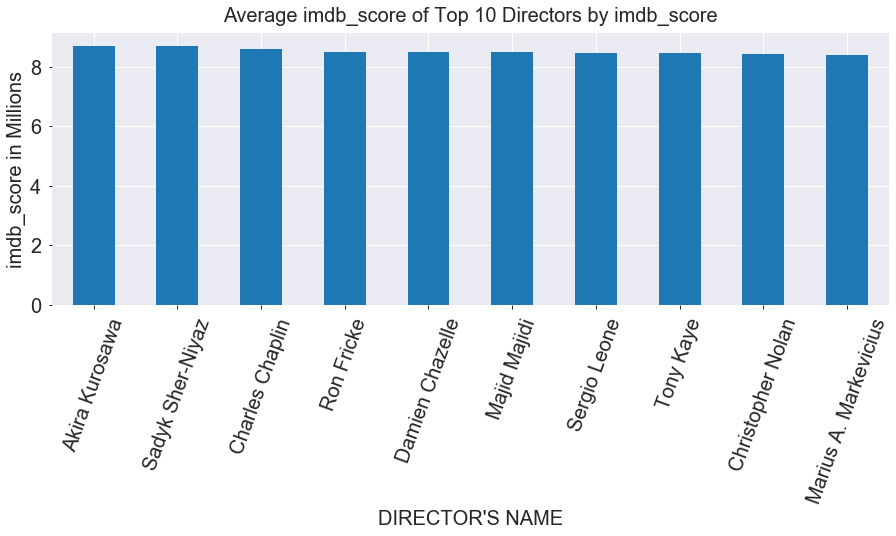

In [39]:
ax = top_10_imdb_score_directors['imdb_score'].plot.bar(fontsize=20 ,figsize=(15,5));
ax.set_ylabel('imdb_score in Millions',fontsize=20)
ax.set_xlabel("DIRECTOR'S NAME",fontsize=20)
ax.set_title('Average imdb_score of Top 10 Directors by imdb_score', y=1.02,fontsize=20)
ax.set_xticklabels(top_10_imdb_score_directors.index, rotation = 70);